# ROBOTICS - Tutorial 1 : Direct and inverse kinematics

### Group: Henrique Gundlach and Lara Polachini

## Introduction

We propose to study the __geometric__ and __kinematic__ modeling of a manipulator arm developed by the *Interactive Robotics Laboratory* of the *CEA List*. This robot, which kinematic chain is of serial type, has $6$ revolute joints ($j_i$ with $i=1,\ldots,6$).


<img src="Images/VueRobot.png" width="400">


The numerical values of the robot parameters, required for the completion of this tutorial, are specified in the following table.

$$
\begin{aligned}
& \text {Table. Numerical values of the robot parameters.}\\
&\begin{array}{cccc}
\hline
		\text{Parameters} &	\text{Numerical values} &	\text{Type of parameter} \\ 
		\hline
		d_3 & 0.7 m & \text{Geometric parameter} \\
		r_1 & 0.5 m & \text{Geometric parameter} \\
		r_4 & 0.2 m & \text{Geometric parameter} \\
        r_E & 0.1 m & \text{Geometric parameter} \\
\hline
\end{array}
\end{aligned}
$$

The use of *Python* is required to perform the tutorial. Please import the following required mathematical libraires to start the tutorial.

In [40]:
import numpy as np
import math as m
import functools as fu
from numpy.linalg import eig
import matplotlib.pyplot as plt
import random

In the following, you will progressively update a *Dictionnary* in Python containing the robot parameters, named __robotParameters__.

Please initialize it as follows: 
*robotParameters = { 'nJoints': 6, 'jointsType': ['R','R','R','R','R','R']}*

In [41]:
robotParameters = { 'nJoints': 6, 'jointsType': ['R','R','R','R','R','R']}

You will also progressively build a *Class* containing some *attributes* related to the robot. To do so, you will be asked to program some of its *methods* in the tutorial. This class is named __RobotModel__ and is defined in the file *ClassRobotModel*.

Please initialize it as follows. You will see printing the resulting *attributes* of the *Class* __RobotModel__.

In [42]:
from ClassRobotModel import RobotModel
RobotTutorials = RobotModel( **robotParameters )

Attribute (int): self.numberJoints =  6
Attribute (list): self.jointsType =  ['R', 'R', 'R', 'R', 'R', 'R']
Attribute (list - 0 if self.jointsType[i] == 'R' / 1 if self.jointsType[i] == 'P'): self.sigma =  [0, 0, 0, 0, 0, 0]


## Direct geometric model

__Q1.__ Fill in the following figure giving the frames attached to the successive links of the robot according to the *Modified Denavit-Hartenberg (MDH)* parameters defining the spatial arrangement of the robot structure (axis names and geometric distances should be reported on the completed figure).

<img src="Images/ParametresDH.png" width="600">

Consulting the orientations from pages 93 and 94, the image was completed as follows:

<img src="Images/DH_completed.png" width="600">

These results are obtained by analysing the pages 93 and 94 of the course book.

__Q2.__ To fill the following table with the geometric parameters of the robot:

$$
\begin{array}{ccccc}
		\hline
		\hline
		 i  & \alpha_i & d_i & \theta_i & r_i \\
		\hline
		\hline
		1  & ? & ? & ? & ? \\
		\hline
		2  & ? & ? & ? & ? \\
		\hline
		3  & ? & ? & ? & ? \\
		\hline
		4  & ? & ? & ? & ? \\
		\hline
		5  & ? & ? & ? & ? \\
		\hline
		6  & ? & ? & ? & ? \\
		\hline
		\hline
\end{array}
$$

please complete the file named *DHM_parameters.txt* in the current repository.

Then, update the dictionnary __robotParameters__ with the DHM parameters as follows: 

*robotParameters['fileDHM'] = "DHM_parameters.txt"*

*RobotTutorials = ClassRobotModel.RobotModel( **robotParameters )*

Look at the resulting *attribute* named *"self.tableDHM"*

From page 95, the resulting matrix should be the following:

$$
\begin{array}{ccccc}
		\hline
		\hline
		 i  & \alpha_i & d_i & \theta_i & r_i \\
		\hline
		\hline
		1  & 0 & 0 & 0 & 0.5 \\
		\hline
		2  & + \pi / 2 & 0 & 0 & 0 \\
		\hline
		3  & 0 & 0.7 & +\pi /2 & 0 \\
		\hline
		4  & +\pi /2 & 0 & 0 & 0.2 \\
		\hline
		5  & -\pi /2 & 0 & 0 & 0 \\
		\hline
		6  & +\pi /2 & 0 & 0 & 0 \\
		\hline
		\hline
\end{array}
$$


In [43]:
robotParameters['fileDHM'] = "DHM_parameters.txt"
RobotTutorials = RobotModel( **robotParameters )

print('------')

for i in np.array(RobotTutorials.tableDHM):
    line = 'DHM: '
    for j in i:
        line += f'| {j:+.4f}'
    print(line)

Attribute (int): self.numberJoints =  6
Attribute (list): self.jointsType =  ['R', 'R', 'R', 'R', 'R', 'R']
Attribute (list - 0 if self.jointsType[i] == 'R' / 1 if self.jointsType[i] == 'P'): self.sigma =  [0, 0, 0, 0, 0, 0]
Attribute (list - float): self.tableDHM =  [[1.0, 0.0, 0.0, 0.0, 0.5], [2.0, 1.5707963267948966, 0.0, 0.0, 0.0], [3.0, 0.0, 0.7, 1.5707963267948966, 0.0], [4.0, 1.5707963267948966, 0.0, 0.0, 0.2], [5.0, -1.5707963267948966, 0.0, 0.0, 0.0], [6.0, 1.5707963267948966, 0.0, 0.0, 0.0]]
------
DHM: | +1.0000| +0.0000| +0.0000| +0.0000| +0.5000
DHM: | +2.0000| +1.5708| +0.0000| +0.0000| +0.0000
DHM: | +3.0000| +0.0000| +0.7000| +1.5708| +0.0000
DHM: | +4.0000| +1.5708| +0.0000| +0.0000| +0.2000
DHM: | +5.0000| -1.5708| +0.0000| +0.0000| +0.0000
DHM: | +6.0000| +1.5708| +0.0000| +0.0000| +0.0000


__Q3-a.__ Write a generic function $TransformMatElem(\alpha_i, d_i, \theta_i, r_i)$ which output argument is the homogeneous transform matrix *g* between two successive frames.

We find the format of the matrix in the book, at the page 96. Its format is the following:

$$
\begin{bmatrix}
		 cos(\theta _i)  & -sin(\theta _i) & 0 & d_i \\
		 cos(\alpha _i)sin(\theta _i)  & cos(\alpha _I)cos(\theta _i) & -sin(\alpha _i) & -r_i sin(\alpha _i) \\
		 sin(\alpha _i)sin(\theta _i)  & sin(\alpha _i) cos(\theta _i) & cos(\alpha _i) & r_i cos(\alpha _i) \\
		 0   & 0 & 0 & 1 \\
\end{bmatrix}
$$

In [44]:
@staticmethod
def TransformMatElem(alpha_i, d_i, theta_i, r_i):
    """ 
    Computation of the homogeneous transform matrix between two successive frames R_(i-1) and R_i
    
    Input: 
        - Four scalar parameters given by the Modified Denavit-Hartenberg (MDH) convention
         
    Output: 
        - Homogeneous transform matrix g_(i-1,i) as a "np.array"
    """
    
    # To be completed...
    x = np.array([[m.cos(theta_i), -m.sin(theta_i), 0, d_i],
                       [m.sin(theta_i)*m.cos(alpha_i), m.cos(theta_i)*m.cos(alpha_i), -m.sin(alpha_i), -r_i*m.sin(alpha_i)],
                       [m.sin(theta_i)*m.sin(alpha_i), m.cos(theta_i)*m.sin(alpha_i), m.cos(alpha_i), r_i*m.cos(alpha_i)],
                       [0, 0, 0, 1]])
    
    return x

RobotModel.TransformMatElem = TransformMatElem

__Q3-b.__ Write a function $ComputeDGM(\text{self}, q)$ which computes the direct geometric model of any robot with series open kinematic chain, taking as input arguments the current configuration.

Now, from page 97, we get the function we need to implement:

In [45]:
def ComputeDGM(self, q_cur):
         """ 
         Computation of the Direct Geometric Model (DGM) of the robot given by its MDH parameters for the joint configuration q_cur
         
         Inputs: 
            - List of robot's geometric parameters "self.tableDHM" given by the Modified Denavit-Hartenberg (MDH) convention
            - Number of joints of the robot "self.numberJoints"
            - List of type of joints of the robot: "self.sigma"
            - Current joint configuration "q_cur"
            
         Outputs: 
            - List of the successive homogeneous transform matrices: "self.list_g_i_1_i = [g_01, ..., g_N_1_N]"
            - List of the successive resulting homogeneous transform matrices: "self.list_g_0i = [g_01, g_02, ..., g_ON]"
         """
         
         # To be completed...   

         self.list_g_i_1_i = []

         for i, alpha, d, theta, r in self.tableDHM:
            self.list_g_i_1_i.append(self.TransformMatElem(alpha, d, theta + q_cur[int(i)-1], r))

         self.list_g_0i = [self.list_g_i_1_i[0]]

         for g_i_1_i in self.list_g_i_1_i[1:]:
            self.list_g_0i.append(self.list_g_0i[-1] @ g_i_1_i)
            
RobotModel.ComputeDGM = ComputeDGM

__Q3-c.__ We consider an end-effector mounted at the end of the robot arm. The frame $\mathcal{R}_E$ attached to the end-effector of the robot is defined by a translation of the frame  $\mathcal{R}_6$ by a distance $r_E$ along the $z_6$ axis.

Specify the four DHM parameters for the tool frame description in the field below.


In [46]:
robotParameters['toolFrameDHM'] = [ 0, 0, 0, 0.1 ]
RobotTutorials = RobotModel( **robotParameters )

Attribute (int): self.numberJoints =  6
Attribute (list): self.jointsType =  ['R', 'R', 'R', 'R', 'R', 'R']
Attribute (list - 0 if self.jointsType[i] == 'R' / 1 if self.jointsType[i] == 'P'): self.sigma =  [0, 0, 0, 0, 0, 0]
Attribute (list - float): self.tableDHM =  [[1.0, 0.0, 0.0, 0.0, 0.5], [2.0, 1.5707963267948966, 0.0, 0.0, 0.0], [3.0, 0.0, 0.7, 1.5707963267948966, 0.0], [4.0, 1.5707963267948966, 0.0, 0.0, 0.2], [5.0, -1.5707963267948966, 0.0, 0.0, 0.0], [6.0, 1.5707963267948966, 0.0, 0.0, 0.0]]
Attribute (list - float): self.toolDHM =  [0, 0, 0, 0.1]


Using the results of previous questions, write a function $ComputeToolPose(\text{self})$  that computes the homogeneous transform matrix $\overline{g}_{0E}$. This matrix gives the position and the orientation of the frame $\mathcal{R}_E$ attached to the end-effector of the robot, expressed in the base frame $\mathcal{R}_0$.

In [47]:
def ComputeToolPose(self):
         """ 
         Computation of the homogeneous transform matrix g0E which gives the position and the orientation of the frame R_E attached to the end-effector of the robot, expressed in the base frame R_0 evaluated at the joint configuration q_cur
         
         Inputs: 
            - List of the successive homogeneous transform matrices "self.list_g_0i"
            - Number of joints of the robot "self.numberJoints"
            - List of the geometric parameters of the tool "self.toolDHM" given by the Modified Denavit-Hartenberg (MDH) convention
            
         Output: 
            - Homogeneous transform matrix "self.g_0E"
         """   

         # completed considering the book page 97
         alpha_i, d_i, theta_i, r_i = self.toolDHM
         g_NE = self.TransformMatElem(alpha_i, d_i, theta_i, r_i)
         self.g_0E = self.list_g_0i[-1] @ g_NE
            
RobotModel.ComputeToolPose = ComputeToolPose

In the following, we consider two joint configurations $q=\left[q_1, \ldots, q_6\right]^t$ of the robot: 

$q_i=\left[-\frac{\pi}{2}, 0 , -\frac{\pi}{2} , -\frac{\pi}{2} , -\frac{\pi}{2} , -\frac{\pi}{2} \right]^t$ 

$q_f=\left[0, \frac{\pi}{4}  , 0 , \frac{\pi}{2} , \frac{\pi}{2} , 0\right]^t$.

Indicate what are the homogeneous transform matrices $\overline{g}_{0E}$ evaluated in these two confugrations.

In [48]:
# Values from the exercise

q_i = [-m.pi/2, 0, -m.pi/2, -m.pi/2, -m.pi/2, -m.pi/2]
q_f = [0, m.pi/ 4, 0, m.pi/2, m.pi/2, 0]

line = 'q_i = '
for qi in q_i:
    line += f' | {qi:+.4f}'
print(line)

q_i =  | -1.5708 | +0.0000 | -1.5708 | -1.5708 | -1.5708 | -1.5708


In [49]:
RobotTutorials.ComputeDGM(q_i)
RobotTutorials.ComputeToolPose()

for i in RobotTutorials.g_0E:
    line = 'q_i = '
    for j in i:
        line += f' | {j:+.4f}'
    print(line)

q_i =  | -0.0000 | -0.0000 | -1.0000 | -0.1000
q_i =  | +1.0000 | -0.0000 | -0.0000 | -0.7000
q_i =  | -0.0000 | -1.0000 | +0.0000 | +0.3000
q_i =  | +0.0000 | +0.0000 | +0.0000 | +1.0000


In [50]:
line = 'q_f = '
for qf in q_f:
    line += f' | {qf:+.4f}'
print(line)

RobotTutorials.ComputeDGM(q_f)
RobotTutorials.ComputeToolPose()

print('---------')

for i in RobotTutorials.g_0E:
    line = 'q_f = '
    for j in i:
        line += f' | {j:+.4f}'
    print(line)

q_f =  | +0.0000 | +0.7854 | +0.0000 | +1.5708 | +1.5708 | +0.0000
---------
q_f =  | -0.7071 | +0.7071 | -0.0000 | +0.6364
q_f =  | -0.0000 | -0.0000 | -1.0000 | -0.1000
q_f =  | -0.7071 | -0.7071 | +0.0000 | +1.1364
q_f =  | +0.0000 | +0.0000 | +0.0000 | +1.0000


__Q4.__ What are the values of positions $P_x, P_y, P_z$ and the parameters related to the orientation $R_{n,q}$ ($n$ being the direction vector and $q \in \left[0,\pi\right]$ the rotation angle such that $R_{n,q}=R_{0E}$) of the end-effector frame for the two joint configurations $q_i=\left[-\frac{\pi}{2}, 0 , -\frac{\pi}{2} , -\frac{\pi}{2} , -\frac{\pi}{2} , -\frac{\pi}{2} \right]^t$ and $q_f=\left[0, \frac{\pi}{4}  , 0 , \frac{\pi}{2} , \frac{\pi}{2} , 0\right]^t$ ($q=\left[q_1, \ldots, q_6\right]^t$)?
To do so, write a function $DescribeToolFrame(\text{self})$ that computes the position vector and the parameters related to the orientation of the end-effector frame for the current configuration.

The answer is built also based in the course book, in the pages 60 and 61:

In [51]:
def DescribeToolFrame(self):
        """ 
        Computation of the position vector and the parameters related to the orientation R_n,q of the end-effector frame for the configuration q as specified in the constructor function 
                  
        Input: 
           - Direct Geometric Model (DGM) of the robot including its end-effector through "self.g_0E"
         
        Outputs: 
           - Values of positions P=[Px, Py, Pz]' (in m) of the origin of frame R_E w.r.t. R_0 given in R_0: "self.P"
           - Orientation parameters R_n,q, as follows:
                   - "self.n": being the direction vector
                   - "self.q" in [0,pi] the rotation angle in rad such that R_n,q = R_0E
        """
        
        R = self.g_0E[0:3, 0:3]

        self.theta = m.atan2( 
            0.5 * m.sqrt( (R[2, 1]-R[1, 2])**2 + (R[0, 2]-R[2, 0])**2 + (R[1, 0]-R[0, 1])**2 ), 
            0.5 * (R[0, 0] + R[1, 1] + R[2, 2] - 1) 
        )

        if m.sin(self.theta) == 0:
            self.w = np.array([0, 0, 0])
        else:
            self.w = (1/(2*m.sin(self.theta))) * np.array([R[2, 1]-R[1, 2], R[0, 2]-R[2, 0], R[1, 0]-R[0, 1]])

        self.P = self.g_0E[0:3, 3]

RobotModel.DescribeToolFrame = DescribeToolFrame        

In [52]:
# Auxiliary functions for displaying arrays and matrices

def printArray(arr, name):
    line = f"{name}:"
    for i in arr:
        line += f' | {i:+.4f}'
    print(line)

def printMatrix(mat, name):
    for i in mat:
        line = f"{name}:"
        for j in i:
            line += f' | {j:+.4f}'
        print(line)

In [53]:
RobotTutorials.ComputeDGM(q_i)
RobotTutorials.ComputeToolPose()
RobotTutorials.DescribeToolFrame()

printArray(RobotTutorials.P, "q_i P: ")
print('---')
printArray(RobotTutorials.w, "q_i w: ")
print('---')
print('Theta = ', RobotTutorials.theta)

q_i P: : | -0.1000 | -0.7000 | +0.3000
---
q_i w: : | -0.5774 | -0.5774 | +0.5774
---
Theta =  2.0943951023931957


In [54]:
# Now for q_f

RobotTutorials.ComputeDGM(q_f)
RobotTutorials.ComputeToolPose()
RobotTutorials.DescribeToolFrame()

printArray(RobotTutorials.P, "q_f P: ")
print('---')
printArray(RobotTutorials.w, "q_f w: ")
print('---')
print('Theta = ', RobotTutorials.theta)

q_f P: : | +0.6364 | -0.1000 | +1.1364
---
q_f w: : | +0.2811 | +0.6786 | -0.6786
---
Theta =  2.5935642459694805


## Direct kinematic model

__Q5.__ Write a function $ComputeJac\left(self, q\right)$ which output is the Jacobian matrix ${}^0J(q)$ (computed by the method of velocities composition).

Reminder: the Jacobian matrix relates the velocities in the task coordinates of the end-effector frame in $\mathcal{R}_0$, for a given joint configuration $q$, to the joint velocities:
\begin{align*}
{}^0\mathcal{V}_{0,E}&= \begin{bmatrix}^0V_{0,E}\left(O_E\right) \\ ^0\omega_{0,E} \end{bmatrix} = \begin{bmatrix} {}^0J_v \left(q\right)  \\ {}^0J_{\omega} \left(q\right)\end{bmatrix} \dot{q} = {}^0J\left(q\right) \dot{q}
\end{align*}

In page 104, we have the Khalil-Kleinfinger convention, that fixes that the joint axis is along the vector $ Z_i = [0 0 1] ^ t $

In page 107, we have the basis to implement the functions for the following function. 

In [55]:
def ComputeJac(self, q_cur):
        """ 
        Computation of the Jacobian matrix mapping the joint velocities to the velocities of the end-effector for a joint configuration "q_cur"
                
        Inputs: 
           - List defining the types of joints : "self.jointsType" 
           - Number of joints of the robot: "self.numberJoints"
           - Current configuration "q_cur"
         
        Output: 
           - Jacobian matrix 0_J in R_0: "self.oJ" as np.array
        """
        
        self.ComputeDGM(q_cur)
        self.ComputeToolPose()
        self.DescribeToolFrame()

        zi = np.array([0, 0, 1]).T
        P = self.g_0E[0:3, 3]

        self.oJ = np.zeros((6, self.numberJoints))

        for i in range(self.numberJoints):
            R0i_1 = self.list_g_0i[i][0:3, 0:3] if i > 0 else np.eye(3)
            p0i_1 = self.list_g_0i[i][0:3, 3] if i > 0 else np.array([0, 0, 0]).T
            pi = P - p0i_1

            if self.jointsType[i] == 'R':
                self.oJ[0:3, i] = np.cross(R0i_1.dot(zi), pi)
                self.oJ[3:6, i] = R0i_1.dot(zi)
            else:  # 'P'    
                self.oJ[0:3, i] = R0i_1.dot(zi)
                self.oJ[3:6, i] = np.array([0, 0, 0])
        
RobotModel.ComputeJac = ComputeJac  

What are the values of the twists at $O_E$ evaluated with $q=q_i$ and $q=q_f$ with the joint velocities $\dot q = \left[0.5, 1.0, -0.5, 0.5, 1.0, -0.5\right]^t$?

In [56]:
qdot = np.array([0.5, 1.0, -0.5, 0.5, 1.0, -0.5]).T
printArray(qdot, "qdot ")

qdot : | +0.5000 | +1.0000 | -0.5000 | +0.5000 | +1.0000 | -0.5000


In [57]:
RobotTutorials.ComputeJac(q_i)
printMatrix(RobotTutorials.oJ, "oJ q_i")
print('---')
printArray(RobotTutorials.oJ @ qdot, "J * qdot ")

oJ q_i: | +0.7000 | +0.0000 | +0.0000 | +0.0000 | +0.0000 | -0.0000
oJ q_i: | -0.1000 | -0.2000 | -0.2000 | +0.1000 | +0.0000 | -0.0000
oJ q_i: | +0.0000 | +0.7000 | -0.0000 | -0.0000 | -0.1000 | -0.0000
oJ q_i: | +0.0000 | -1.0000 | -1.0000 | -0.0000 | -0.0000 | -1.0000
oJ q_i: | +0.0000 | -0.0000 | -0.0000 | -0.0000 | -1.0000 | -0.0000
oJ q_i: | +1.0000 | +0.0000 | +0.0000 | -1.0000 | -0.0000 | +0.0000
---
J * qdot : | +0.3500 | -0.1000 | +0.6000 | +0.0000 | -1.0000 | -0.0000


In [58]:
# Now for q_f
RobotTutorials.ComputeJac(q_f)
printMatrix(RobotTutorials.oJ, "oJ q_f")

oJ q_f: | +0.1000 | -0.6364 | -0.1414 | +0.0707 | -0.0707 | +0.0000
oJ q_f: | +0.6364 | +0.0000 | +0.0000 | +0.0000 | -0.0000 | +0.0000
oJ q_f: | -0.0000 | +0.6364 | +0.1414 | -0.0707 | -0.0707 | +0.0000
oJ q_f: | +0.0000 | +0.0000 | +0.0000 | +0.7071 | +0.7071 | -0.0000
oJ q_f: | +0.0000 | -1.0000 | -1.0000 | -0.0000 | -0.0000 | -1.0000
oJ q_f: | +1.0000 | +0.0000 | +0.0000 | +0.7071 | -0.7071 | +0.0000


In [59]:
printArray(RobotTutorials.oJ @ qdot, "J * qdot ")

J * qdot : | -0.5510 | +0.3182 | +0.4596 | +1.0607 | -0.0000 | +0.1464


__Q6.__ In the rest of the study, we restrict the analysis of operational end-effector velocities to translational velocities via ${}^0J_v \left(q\right)$.

Qualify the transmission of velocities between the joint and task spaces for the corresponding $q_i$ and $q_f$ configurations: what is the preferred direction to transmit velocity in the task space when the manipulator configuration is $q_i$? Same question for $q_f$? What are the corresponding velocity manipulabilities? 
To help, you can program a function $QualifyVelocityTransmission(self)$ that analyses the property of the Jacobian matrix. Explain your results.

Analysing the transmission of velocities from jacobian matrix, we have:

In [60]:
def QualifyVelocityTransmission(self) -> None:
   """ 
    Qualifying the transmission of velocities
              
    Input:
       - Jacobian matrix "self.oJ" to be analysed
     
    Outputs: 
       - To be defined...
   """
    
    # Jacobian of Translational Velocities
   Jv = self.oJ[0:3, :]

   U, S, _ = np.linalg.svd(Jv)

   self.preferredDirection = U[:, 0]
   self.velocityManipulability = np.prod(S)

   self.conditionNumber = np.linalg.cond(Jv)
   self.rank = np.linalg.matrix_rank(Jv)
   self.det = np.linalg.det(Jv @ Jv.T)

RobotModel.QualifyVelocityTransmission = QualifyVelocityTransmission 

In [61]:
RobotTutorials.ComputeJac(q_i)
RobotTutorials.QualifyVelocityTransmission()
printArray(RobotTutorials.preferredDirection, "q_i: preferredDirection")
print(f"q_i: velocityManipulability = {RobotTutorials.velocityManipulability:.4f}")

RobotTutorials.ComputeJac(q_f)
RobotTutorials.QualifyVelocityTransmission()
printArray(RobotTutorials.preferredDirection, "q_f: preferredDirection")
print(f"q_f: velocityManipulability = {RobotTutorials.velocityManipulability:.4f}")

q_i: preferredDirection: | +0.3660 | -0.3263 | +0.8715
q_i: velocityManipulability = 0.1116
q_f: preferredDirection: | -0.7114 | -0.0975 | +0.6959
q_f: velocityManipulability = 0.0590


According to the book Interactive Robotic Systems, the rank of the Jacobian matrix represents the degrees of freedom of the robot space associated with the end-effector frame, which corresponds to the dimensionality of the task space reachable at a given configuration $q$ (page 100).

Based on this, it can be observed that a Jacobian with a higher rank indicates that the end-effector can access a larger task space. As stated on the book, when the determinant of the Jacobian matrix is zero, the robot is said to be in a singular configuration.

The principal axes of the manipulability ellipsoid are defined by its eigenvectors, and the ellipsoid’s volume serves as a measure of the robot’s ability to generate velocity, known as velocity manipulability.

From the obtained results, the configuration $q_i$ demonstrates a greater ability to generate velocity, as it exhibits higher velocity manipulability.

## Inverse geometric model

__Q7.__ In this study, the resolution of the inverse geometric model is considered numerically by exploiting the inverse differential model. Moreover, the study is restricted to the position only of the robot's end-effector frame in the task space (no constraint on the orientation of the end-effector frame).

Using an iterative procedure exploiting the pseudo-inverse of the Jacobian matrix, program a function $ComputeIGM(\text{self}, X_d, q_0, k_{max}, \epsilon_x)$ having as input arguments the desired task position $X_d$ and the initial condition $q_0$. Both the maximum number of iterations $k_{max}$ of the algorithm and the norm of the tolerated Cartesian error $|X_d - DGM(q_{k})|<\epsilon_x$, define the stopping criteria of the algorithm.

Based on the book Interactive Robotics Systems (page 130), we used an optimization method considering a cartisian error as stop condition.

In [62]:
def ComputeIGM(self, X_d, q_0, k_max, eps_x):    
        """ 
        Computation of the Inverse Geometric Model (IGM) mapping the Cartesian pose to the joint vector "q"
                
        Inputs: 
           - Desired Cartesian vector "X_d" as a np.array to be reached by the robot 
           - Initial condition "q_0" as a np.array
           - Number "k_max" of maximal iteration in the recursive algorithm 
           - Norm of the tolerated Cartesian error "eps_x"
         
        Outputs: 
           - List "self.list_q_IGM" of the joint vectors computed at each iteration of the recursive algorithm 
           - Returned "self.list_q_IGM[-1]" of the final found joint vector, solution of the IGM
           
        """
        
        # To be completed...
        # x=1
        self.list_q_IGM = [q_0]
        q_0 = q_0
        q_k = q_0

        for _ in range(k_max):
         self.ComputeDGM(q_k)
         self.ComputeToolPose()
         
         X_k = self.g_0E[0:3, 3]

         self.ComputeJac(q_k)
         J_v = self.oJ[0:3, :]

         q_k = q_k + np.linalg.pinv(J_v) @ (X_d - X_k)
         self.list_q_IGM.append(q_k)

         if np.linalg.norm(X_d - X_k) < eps_x:
            break

        return self.list_q_IGM[-1]

RobotModel.ComputeIGM = ComputeIGM 

Compute $q^{\ast}$ when the function is called with the following arguments:

a) $X_d=X_{d_i}=\left(-0.1, -0.7, 0.3\right)^t$, $q_0=\left[ -1.57, 0.00 , -1.47, -1.47, -1.47 , -1.47 \right.$ $\left., -1.47 \right]$, $k_{max}=100$, $\epsilon_x=1$mm?

b) $X_d=X_{d_f}=\left(0.64 , -0.10, 1.14\right)^t$, $q_0=\left[ 0 , 0.80 , 0.00 , 1.00 , 2.00 , 0.00 \right]$, $k_{max}=100$, $\epsilon_x=1$mm?

Check the accuracy of the results using the function calculated in __Q3.__

In the case a)

In [63]:
X_di = np.array([-0.10, -0.70, +0.30]).T
q_0i = np.array([-1.57, +0.00, -1.47, -1.47, -1.47, -1.47])
k_max = 100          
eps_x = 1e-3

printArray(np.array(q_i), "q_i:")
printArray(RobotTutorials.ComputeIGM(X_di, q_0i, k_max, eps_x), "q_0_IGM:")
printArray(RobotTutorials.g_0E[0:3, 3], "p_i:")
printArray(X_di, "X_di:")
printArray(np.abs(X_di - RobotTutorials.g_0E[0:3, 3]), "error_i:")

q_i:: | -1.5708 | +0.0000 | -1.5708 | -1.5708 | -1.5708 | -1.5708
q_0_IGM:: | -1.5725 | +0.0132 | -1.5232 | -1.4452 | -1.4819 | -1.4700
p_i:: | -0.0999 | -0.7000 | +0.3003
X_di:: | -0.1000 | -0.7000 | +0.3000
error_i:: | +0.0001 | +0.0000 | +0.0003


Now in the case b)

In [64]:
X_df = np.array([+0.64, -0.10, +1.14]).T
q_0f = np.array([+0.00, +0.80, +0.00, +1.00, +2.00, +0.00])
k_max = 100          
eps_x = 1e-3

printArray(np.array(q_f), "q_f")
printArray(RobotTutorials.ComputeIGM(X_df,q_0f, k_max, eps_x), "q_f_IGM")
printArray(RobotTutorials.g_0E[0:3, 3], "p_f")
printArray(X_df, "X_df")
printArray(np.abs(X_df - RobotTutorials.g_0E[0:3, 3]), "error_f")

q_f: | +0.0000 | +0.7854 | +0.0000 | +1.5708 | +1.5708 | +0.0000
q_f_IGM: | -0.0246 | +0.7643 | -0.1782 | +1.0017 | +1.5693 | +0.0000
p_f: | +0.6399 | -0.0999 | +1.1399
X_df: | +0.6400 | -0.1000 | +1.1400
error_f: | +0.0001 | +0.0001 | +0.0001


## Inverse kinematic model

In this question, the trajectory of the end-effector to be followed in the task space must allow the desired final position $X_{d_f}$ to be reached by following a straight line in the task space starting at the initial position $X_{d_i}$. This rectilinear motion is carried out at a constant speed $V=1m.s^{-1}$ and is sampled at a period $T_e=1$ms. The position of the end effector at the time instant $kT_e$ is noted $X_{d_k}$. The initial configuration of the robot is given by $q_i$ (found in question __Q4.__).

__Q8.__ Using the inverse differential kinematic model, write a function entitled $ComputeIKM( \text{self}, X_{d_i}, X_{d_f}, V, T_e, q_i)$ realizing the coordinate transform to provide the series of setpoint values $q_{d_k}$ corresponding to the $X_{d_k}$ to the joint drivers. To do this, after having programmed the time law corresponding to the required motion, you can use the function developed in question __Q7__ capable of calculating the iterative MGI from the pseudo-inverse of the Jacobian matrix.

In [65]:
def ComputeIKM(self, X_d_i, X_d_f, V, Te, q_i, k_max, eps_x):    
        """ 
        Computation of the Inverse differential Kinematic Model (IKM) making the coordinate transform to provide the series of setpoint values qdk corresponding to the Xdk to the joint drivers
        
        Inputs: 
           - Trajectory of the end effector to be followed in the task space between:
               - the initial position "X_d_i"
               - the desired final position "X_d_f" to be reached.
           - Rectilinear motion carried out :
               - at a constant speed "V"
               - sampled at a period "Te"
           - Initial configuration of the robot "q_i"
           - Number "k_max" of maximal iteration in the recursive algorithm (to be used with "self.ComputeIGM")
           - Norm of the tolerated Cartesian error "eps_x" (to be used with "self.ComputeIGM")
           
        Outputs: 
           - List "self.discreteTime" that defines the the sampled temporal series for each time step
           - List "self.list_X_d_k" of the intermediate Cartesian poses to be reached by the robot
           - List "self.list_q_dk" of the joint vectors computed at each iteration k of the recursive algorithm (series of setpoint values qdk corresponding to the Xdk to the joint drivers)
        """     
        #Inputs
        distance = np.linalg.norm(X_d_f - X_d_i)
        duration = distance / V
        steps = int(duration / Te)

        #Outputs
        self.discreteTime = np.array([k * Te for k in range(steps + 1)])
        self.list_X_d_k = [X_d_i + k / steps * (X_d_f - X_d_i) for k in range(steps + 1)]

        q_k = q_i
        self.list_q_d_k = []

        for X_d_k in self.list_X_d_k:
           q_k = self.ComputeIGM(X_d_k, q_k, k_max, eps_x)
           self.list_q_d_k.append(q_k)
        
        

RobotModel.ComputeIKM = ComputeIKM 

Check that the successively reached positions of the end-effector is following the desired trajectory. To do so, you can plot the error between the sequence of positions reached by the end device and the position set points at each time step.

In [66]:
def plot_coord(
        discrete_time: np.ndarray,
        list_q_d_k: np.ndarray,
        values_IKM: np.ndarray
    ) -> None:
    """
    Display 3D coordinates errors with a different visualization layout.
    """

    # --- Compute DGM positions ---
    values_DGM_array = []
    for q_d_k in list_q_d_k:
        RobotTutorials.ComputeDGM(q_d_k)
        RobotTutorials.ComputeToolPose()
        values_DGM_array.append(RobotTutorials.g_0E[0:3, 3])

    values_DGM = np.array(values_DGM_array)

    # --- Compute errors ---
    errors = np.linalg.norm(values_IKM - values_DGM, axis=1)
    coord_errors = values_IKM - values_DGM

    # --- Create figure ---
    fig, axes = plt.subplots(
        2, 3, figsize=(14, 8),
        gridspec_kw={"height_ratios": [2, 1]},
        sharex=True
    )

    # ===== Overall error (top, spanning all columns) =====
    ax_err = plt.subplot2grid((2, 3), (0, 0), colspan=3)
    ax_err.plot(discrete_time, errors, color="red", linewidth=2)
    ax_err.set_title("Overall Cartesian Error (‖X_d − X‖)")
    ax_err.set_ylabel("Error [m]")
    ax_err.set_yscale("log")
    ax_err.grid(True)

    # ===== Coordinate-wise errors (bottom row) =====
    labels = ["X", "Y", "Z"]
    colors = ["tab:blue", "tab:orange", "tab:green"]

    for i in range(3):
        axes[1, i].plot(
            discrete_time,
            coord_errors[:, i],
            color=colors[i],
            label=f"{labels[i]} error"
        )
        axes[1, i].axhline(0, color="black", linestyle="--", linewidth=0.8)
        axes[1, i].set_title(f"{labels[i]} coordinate error")
        axes[1, i].set_yscale("log")
        axes[1, i].set_xlabel("time [s]")
        axes[1, i].grid(True)
        axes[1, i].legend()

    plt.tight_layout()
    plt.show()


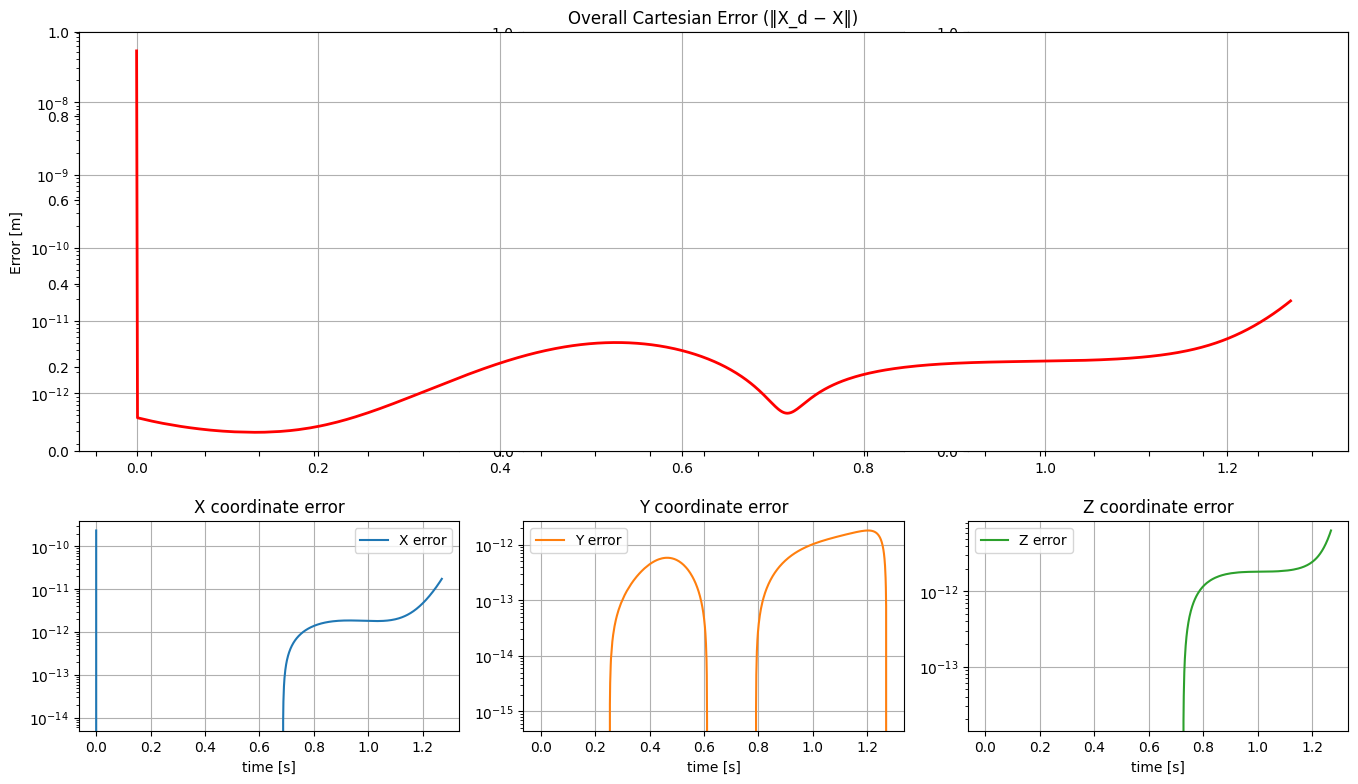

In [67]:
RobotTutorials.ComputeIKM(
    X_d_i=X_di,
    X_d_f=X_df,
    V=1,
    Te=0.001,
    q_i=q_0i,
    k_max=k_max,
    eps_x=eps_x
)

plot_coord(
    RobotTutorials.discreteTime,
    RobotTutorials.list_q_d_k,
    np.array(RobotTutorials.list_X_d_k)
)

__Q9.__ Plot the temporal evolution of the joint variables $q_1$ to $q_6$ calculated in the previous question. For each joint variable, graphically overlay the allowable extreme values corresponding to the joint limits:
\begin{align*}
q_{min} = \left[\begin{array}{c}{ -\pi , -\frac{\pi}{2} , -\pi , -\pi , -\frac{\pi}{2}, -\pi }\end{array}\right] 
\end{align*}
and
\begin{align*}
q_{max} = \left[\begin{array}{c}{ 0 , \frac{\pi}{2} , 0  ,\frac{\pi}{2}, \frac{\pi}{2} , \frac{\pi}{2} }\end{array}\right] 
\end{align*}

In [68]:
def plot_limits(
        discrete_time: np.ndarray,
        joints_variables: np.ndarray,
        q_min: np.ndarray,
        q_max: np.ndarray,
    ) -> None:
    """
    Display joints evolution w.r.t. their limits using a different layout (2x3 grid).
    """

    # ---- Ensure array shapes are consistent ----
    # Prefer joints_variables shape: (N, 6)
    joints_variables = np.asarray(joints_variables)
    if joints_variables.shape[0] == 6 and joints_variables.shape[1] == len(discrete_time):
        # Convert from (6, N) to (N, 6)
        joints_variables = joints_variables.T

    if joints_variables.shape[0] != len(discrete_time) or joints_variables.shape[1] != 6:
        raise ValueError(
            f"Expected joints_variables shape (N, 6) with N=len(discrete_time). "
            f"Got {joints_variables.shape} and len(discrete_time)={len(discrete_time)}."
        )

    q_min = np.asarray(q_min).reshape(6,)
    q_max = np.asarray(q_max).reshape(6,)

    # ---- Plot ----
    fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=True)
    axes = axes.ravel()

    yticks = [
        -4*np.pi/4, -3*np.pi/4, -2*np.pi/4, -1*np.pi/4, 0,
        +1*np.pi/4, +2*np.pi/4, +3*np.pi/4, +4*np.pi/4
    ]

    for i in range(6):
        ax = axes[i]
        ax.plot(discrete_time, joints_variables[:, i], linewidth=2, label=f"q{i+1}")
        ax.axhline(q_min[i], color="green", linestyle="--", linewidth=1, label="q_min")
        ax.axhline(q_max[i], color="purple", linestyle="--", linewidth=1, label="q_max")

        ax.set_title(f"Joint q{i+1}")
        ax.set_ylabel("[rad]")
        ax.set_yticks(yticks)
        ax.set_ylim([-np.pi - 0.1, +np.pi + 0.1])
        ax.grid(True)

        # Only show the legend once to avoid clutter
        if i == 0:
            ax.legend(loc="upper left")

    # Use your old x-limits if you want them fixed
    # ax.set_xlim([0, 1.4]) for all axes:
    for ax in axes:
        ax.set_xlim([0, 1.4])

    # X label only on bottom row
    axes[3].set_xlabel("time [s]")
    axes[4].set_xlabel("time [s]")
    axes[5].set_xlabel("time [s]")

    plt.tight_layout()
    plt.show()


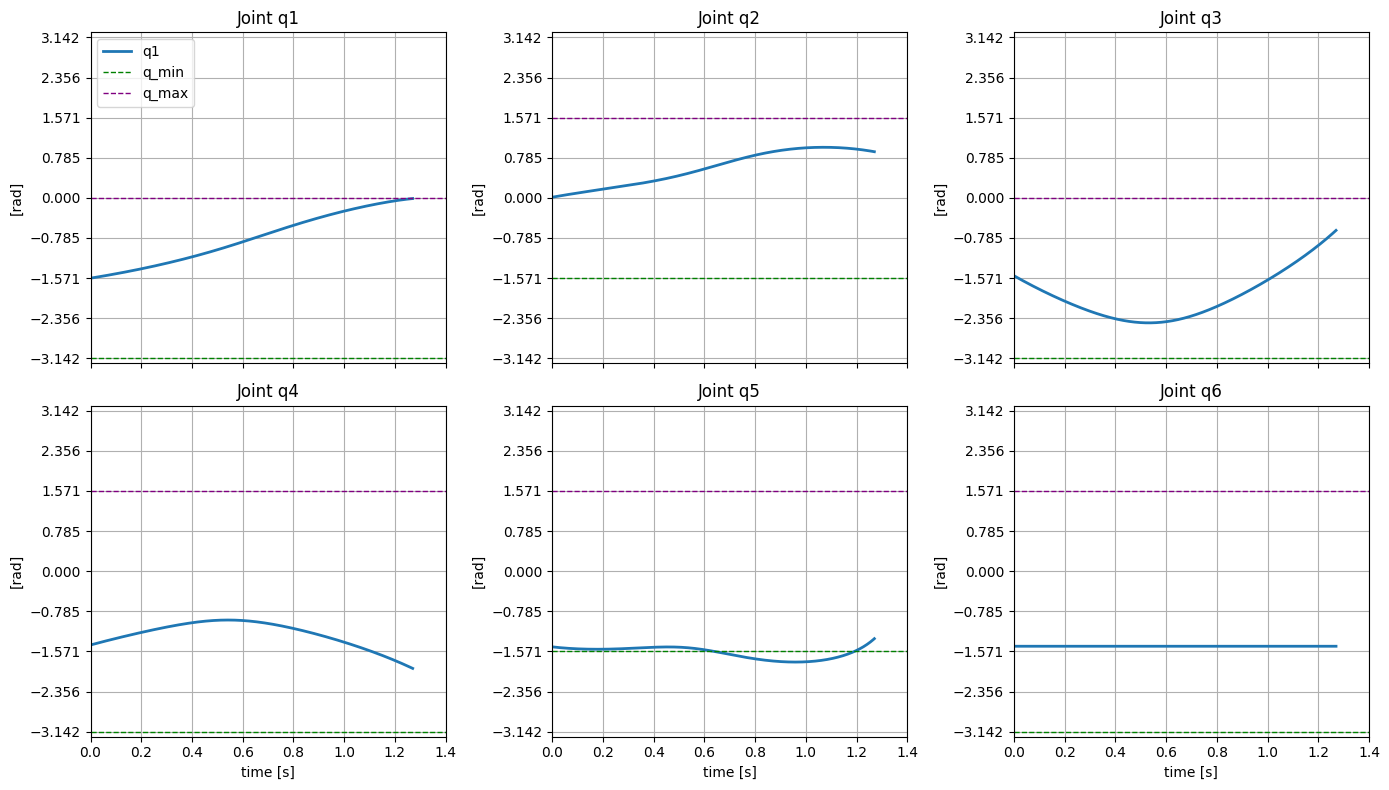

In [69]:
q_min = np.array([-np.pi, -np.pi/2, -np.pi, -np.pi, -np.pi/2, -np.pi])
q_max = np.array([0, np.pi/2, 0, np.pi/2, np.pi/2, np.pi/2])

plot_limits(
    RobotTutorials.discreteTime,
    np.array(RobotTutorials.list_q_d_k).T,
    q_min,
    q_max,
)

Comment on the evolution of the joint variables obtained previously.

From the figure, it can be observed that most joint variables evolve smoothly and remain within their respective mechanical limits during the motion. However, joint $q5$ violates its inferior joint limit, indicating that the computed joint trajectory is not physically feasible for the robot.
This result shows that the ComputeIKM() function does not take joint limits into account, and therefore may generate trajectories that cannot be executed by the robot, even if the desired cartesian trajectory is well defined.

__Q10.__ In this question, we modify the algorithm developed in question __Q8__. We wish to take into account the distance of the values taken by the joint variables from their limits in the computation of the inverse kinematic model.

To do so, you will need to consider a secondary task aiming at keeping some distance from the articular stops $q_{min}$ and $q_{max}$. By the technique of the gradient projected into the null space of ${}^0J_v \left(q\right)$, you will consider minimizing the following potential function:
\begin{align*}
			H_{lim}\left(q\right) = \sum_{i=1}^{n} \left(\frac{q_i-\overline{q}_{i}}{q_{max}-q_{min}}\right)^2 \hspace{0.2cm} \text{where} \hspace{0.2cm} \overline{q}_{i} =  \frac{q_{max}+q_{min}}{2} 
\end{align*}

First, provide below the theoretical analytical solution for the joint variables to this problem.


The problem of following a desired Cartesian trajectory while maintaining a safe distance from the joint limits can be addressed by introducing a cost function that penalizes configurations close to the limits. This approach leads to an analytical solution based on the minimization of the joint-limit potential function $ H_{\text{lim}}(q) $, defined as:

$$
H_{\text{lim}}(q) = \sum_{i=1}^{n} \left( \frac{q_i - \bar{q}_i}{q_{\text{max},i} - q_{\text{min},i}} \right)^2
$$

where:

$$
\bar{q}_i = \frac{q_{\text{max},i} + q_{\text{min},i}}{2}
$$

denotes the center of the admissible range for the $ i $-th joint.


Minimizing this potential function requires computing its gradient with respect to the joint variables $ q $:

$$
\nabla H_{\text{lim}}(q) = \frac{\partial H_{\text{lim}}(q)}{\partial q}
= 2 \sum_{i=1}^{n} \frac{q_i - \bar{q}_i}{\left( q_{\text{max},i} - q_{\text{min},i} \right)^2}
$$

The gradient points in the direction of increasing cost and therefore provides a corrective term that pushes the joint configuration away from the limits.

To preserve the main task of tracking the desired end-effector trajectory, this corrective term is projected onto the null space of the Jacobian matrix $ {}^0J_v(q) $. As a result, joint-limit avoidance is achieved without affecting the cartesian motion.

The joint update law at iteration $k$ can thus be written as:

$$
q_{k+1} = q_k 
+ {}^0J_v^\dagger(q_k)\, e
+ \left( I - {}^0J_v^\dagger(q_k)\, {}^0J_v(q_k) \right)\, \nabla H_{\text{lim}}(q_k)\, \Delta t
$$

Where:

- $ q_k $ is the joint configuration at iteration $ k $,
- $ {}^0J_v^\dagger(q_k) $ denotes the pseudo-inverse of the Jacobian,
- $ e $ represents the cartesian error between the desired and current end-effector positions,
- $ I $ is the identity matrix
- $ \Delta t $ is the time step


Then, develop a new function $ComputeIKMlimits(\text{self}, X_{d_i}, X_{d_f}, V, T_e, q_i, q_{min}, q_{max})$ which implements the inverse kinematic model able to take into account the previous secondary task.

In [70]:
# page 135 of the book

from turtle import speed


def ComputeIKMlimits(self, X_d_i, X_d_f, V, Te, q_i, k_max, eps_x, q_min, q_max, alpha=0.05):    
    """ 
        Computation of the Inverse differential Kinematic Model (IKM) making the coordinate transform to provide the series of setpoint values qdk corresponding to the Xdk to the joint drivers while taking into account the joint limits
        
        Inputs: 
           - Trajectory of the end effector to be followed in the task space between:
               - the initial position "X_d_i"
               - the desired final position "X_d_f" to be reached.
           - Rectilinear motion carried out :
               - at a constant speed "V"
               - sampled at a period "Te"
           - Initial configuration of the robot "q_i"
           - Number "k_max" of maximal iteration in the recursive algorithm (to be used with "self.ComputeIGM")
           - Norm of the tolerated Cartesian error "eps_x" (to be used with "self.ComputeIGM")
           - Vector of lower bound of joint variable "q_min"
           - Vector of upper bound of joint variable "q_max"
           
        Outputs: 
           - List "self.list_q_dk_limits" of the joint vectors computed at each iteration k of the recursive algorithm (series of setpoint values qdk corresponding to the Xdk to the joint drivers)
           - List "self.list_X_d_k" of the intermediate Cartesian poses to be reached by the robot    
    """     
        
    distance = np.linalg.norm(X_d_f - X_d_i)
    total_time = distance / V
    num_steps = int(total_time / Te)

    self.discreteTime = np.array([k * Te for k in range(num_steps + 1)])
    self.list_X_d_k = [X_d_i + k / num_steps * (X_d_f - X_d_i) for k in range(num_steps + 1)]
    self.list_q_d_k_limits = []

    q_mid = (q_max + q_min) / 2

    q_k = q_i
    for X_d_k in self.list_X_d_k:
        for _ in range(k_max):
            self.ComputeDGM(q_k)
            self.ComputeToolPose()

            X_k = self.g_0E[0:3, 3]
            X_d_d = X_d_k - X_k

            self.ComputeJac(q_k)
            J_k = self.oJ[0:3, :]

            grad_H = 2 * (q_k - q_mid) / (q_max - q_min)**2

            J_pinv = np.linalg.pinv(J_k)
            q_0_d = -alpha * grad_H

            q_k = q_k + J_pinv @ X_d_d + (np.eye(len(q_k)) - J_pinv @ J_k) @ q_0_d

            if np.linalg.norm(X_d_d) < eps_x:
                break

        self.list_q_d_k_limits.append(q_k)
        
            
RobotModel.ComputeIKMlimits = ComputeIKMlimits



Plot the new temporal evolution of the joint variables $q_1$ to $q_6$ for the reference trajectory given in the question __Q9__.

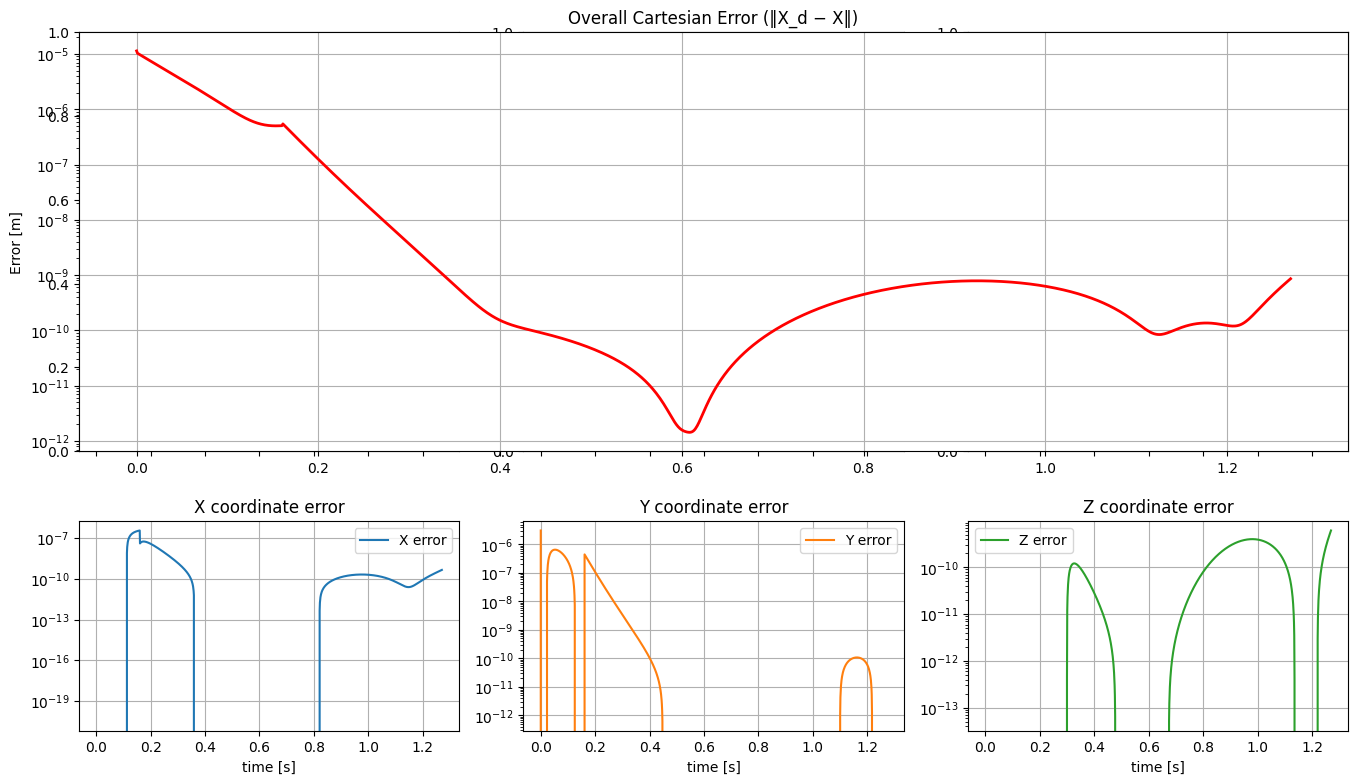

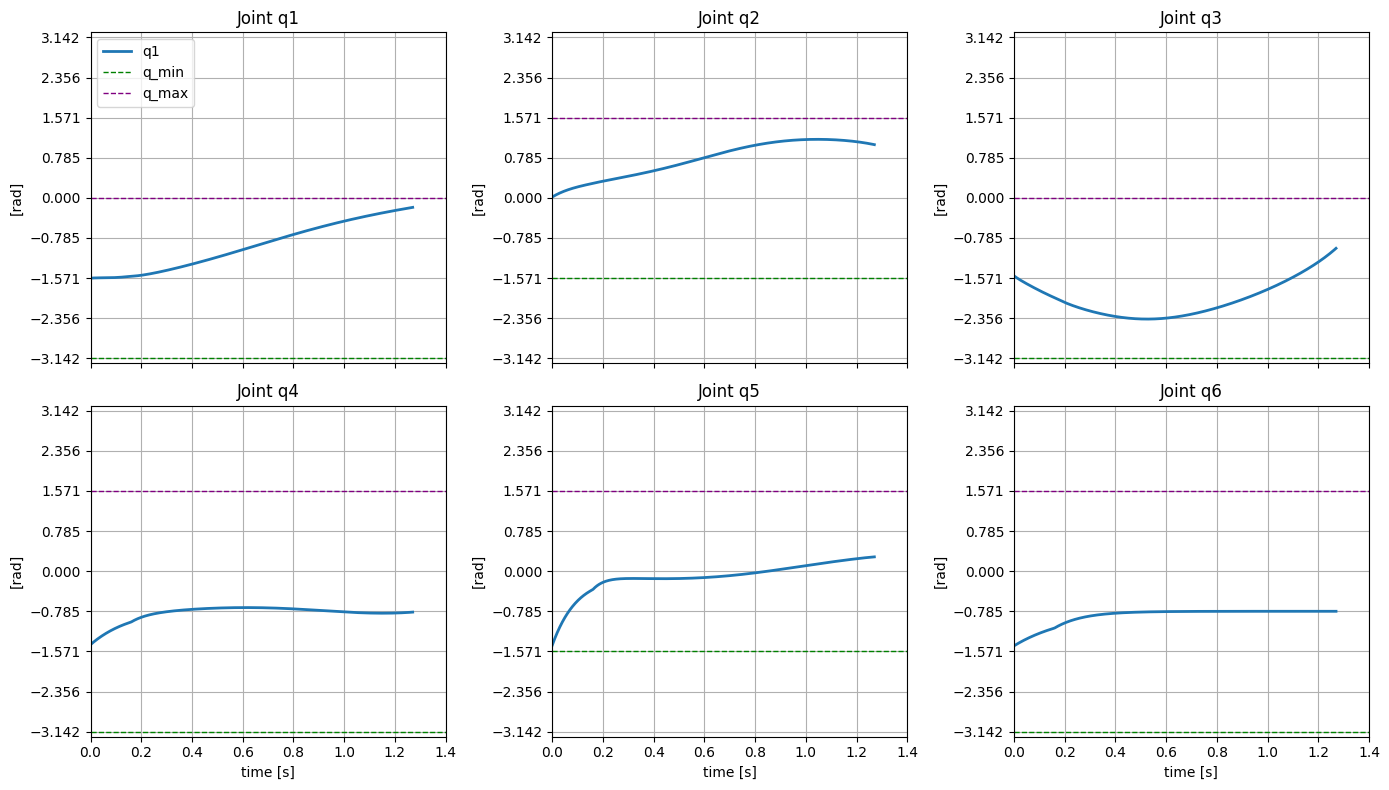

In [71]:
q_min = np.array([-np.pi, -np.pi/2, -np.pi, -np.pi, -np.pi/2, -np.pi])
q_max = np.array([0, np.pi/2, 0, np.pi/2, np.pi/2, np.pi/2])

RobotTutorials.ComputeIKMlimits(X_d_i = X_di, X_d_f = X_df, V=1, Te=0.001, q_i=q_0i, k_max=100, eps_x=0.001, q_min=q_min, q_max=q_max)

plot_coord(
    RobotTutorials.discreteTime,
    RobotTutorials.list_q_d_k_limits,
    np.array(RobotTutorials.list_X_d_k)
)

plot_limits(
    RobotTutorials.discreteTime,
    np.array(RobotTutorials.list_q_d_k_limits).T,
    q_min,
    q_max,
)

Comment on the values taken by the joint variables.

While all joint configurations now satisfy their limit constraints and avoid impossible configurations, this improvement results in a higher error in coordinate estimation, which can be considered an acceptable compromise between the two methods.